# Test E & C Index calcs

In [1]:
import sys
sys.path.append('../')

#import my functions
import helpers.fileHandler as fh
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index

In [2]:
import xarray
import numpy
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import dask.config
dask.config.set({"array.slicing.split_large_chunks": False})

# 1. Calculate CMIP Indeces

In [5]:
modelSet=_model.scenarioMip

In [6]:
modelSet

array([['CSIRO-ARCCSS', 'ACCESS-CM2', 'r1i1p1f1', 'r1i1p1f1'],
       ['CSIRO', 'ACCESS-ESM1-5', 'r1i1p1f1', 'r1i1p1f1'],
       ['AWI', 'AWI-CM-1-1-MR', 'r1i1p1f1', 'r1i1p1f1'],
       ['BCC', 'BCC-CSM2-MR', 'r1i1p1f1', 'r1i1p1f1'],
       ['CAMS', 'CAMS-CSM1-0', 'r1i1p1f1', 'r1i1p1f1'],
       ['CAS', 'CAS-ESM2-0', 'r1i1p1f1', 'r1i1p1f1'],
       ['NCAR', 'CESM2', 'r1i1p1f1', 'r10i1p1f1'],
       ['NCAR', 'CESM2-WACCM', 'r1i1p1f1', 'r1i1p1f1'],
       ['THU', 'CIESM', 'r1i1p1f1', 'r1i1p1f1'],
       ['CMCC', 'CMCC-CM2-SR5', 'r1i1p1f1', 'r1i1p1f1'],
       ['CMCC', 'CMCC-ESM2', 'r1i1p1f1', 'r1i1p1f1'],
       ['CNRM-CERFACS', 'CNRM-CM6-1', 'r1i1p1f2', 'r1i1p1f2'],
       ['CNRM-CERFACS', 'CNRM-ESM2-1', 'r1i1p1f2', 'r1i1p1f2'],
       ['CCCma', 'CanESM5', 'r1i1p1f1', 'r1i1p1f1'],
       ['CCCma', 'CanESM5-CanOE', 'r1i1p2f1', 'r1i1p2f1'],
       ['EC-Earth-Consortium', 'EC-Earth3', 'r1i1p1f1', 'r1i1p1f1'],
       ['EC-Earth-Consortium', 'EC-Earth3-CC', 'r1i1p1f1', 'r1i1p1f1'],
       ['

In [7]:
len(modelSet)

38

Climatology and piControl:

In [8]:
for iModel in [modelSet[29]]:
    
    print(iModel)
    
    try: 
            
        #to replicate Wang 2020
        tsXr = xarray.concat([fh.loadModelData(iModel[1], 'tos_Omon', 'historical', iModel[3], 
                                               chunks={'time':120}).tos, 
                              fh.loadModelData(iModel[1], 'tos_Omon', 'ssp585', iModel[3], 
                                               chunks={'time':120}).tos], 
                             dim='time')

        #tsXr = tsXr.where((tsXr.time.dt.year>=1900) * (tsXr.time.dt.year<2100), 
        #    drop=True)

        
    except Exception as e:
        print(iModel[1] + "Climatology did not calculate")
        print(e)
 

['MIROC' 'MIROC-ES2L' 'r1i1p1f2' 'r1i1p1f2']
['/mnt/e/CMIP5-PMIP3/CMIP6/tos_Omon_MIROC-ES2L_historical_r1i1p1f2_gn_185001-201412.nc']
['/mnt/e/CMIP5-PMIP3/CMIP6/tos_Omon_MIROC-ES2L_ssp585_r1i1p1f2_gn_201501-210012.nc']


In [9]:
tsXr

<xarray.DataArray 'tos' (time: 3012, y: 256, x: 360)>
dask.array<concatenate, shape=(3012, 256, 360), dtype=float32, chunksize=(120, 256, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 00:00:00 ... 2100-12-16 00:00:00
  * y        (y) float64 -88.0 -85.75 -85.25 -84.75 ... 146.8 148.6 150.5 152.4
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    lat      (y, x) float32 -88.0 -88.0 -88.0 -88.0 ... 64.86 64.43 64.0 63.56
    lon      (y, x) float32 60.5 61.5 62.5 63.5 64.5 ... 59.94 59.96 59.98 59.99
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    original_name:  TO
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    history:        2019-07-10T00:47:14Z altered by CMOR: replaced missing va...

Cut it into the area of interest

In [10]:
tsXr=tsXr.where(
    (tsXr.lat>=-15) & (tsXr.lat<=15) &
    (tsXr.lon>=140) & (tsXr.lon<=280),
    drop=True
)

In [11]:
tsXr=tsXr.where(
    (tsXr.time.dt.year>=1900) * (tsXr.time.dt.year<2100), 
    drop=True
)


In [12]:
tsXr 

<xarray.DataArray 'tos' (time: 2400, y: 45, x: 140)>
dask.array<where, shape=(2400, 45, 140), dtype=float32, chunksize=(120, 45, 140), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1900-01-16 00:00:00 ... 2099-12-16 00:00:00
  * y        (y) float64 -14.9 -13.9 -12.91 -11.93 ... 11.4 12.36 13.34 14.33
  * x        (x) float64 80.5 81.5 82.5 83.5 84.5 ... 216.5 217.5 218.5 219.5
    lat      (y, x) float32 -14.9 -14.9 -14.9 -14.9 ... 14.33 14.33 14.33 14.33
    lon      (y, x) float32 140.5 141.5 142.5 143.5 ... 276.5 277.5 278.5 279.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    units:          degC
    original_name:  TO
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    history:        2019-07-10T00:47:14Z altered by CMOR: replaced missing va...

In [13]:
from eofs.xarray import Eof



In [14]:
trendXr = tsXr.polyfit('time', 2)

In [15]:
trendXr

<xarray.Dataset>
Dimensions:               (degree: 3, x: 140, y: 45)
Coordinates:
  * degree                (degree) int64 2 1 0
  * y                     (y) float64 -14.9 -13.9 -12.91 ... 12.36 13.34 14.33
  * x                     (x) float64 80.5 81.5 82.5 83.5 ... 217.5 218.5 219.5
Data variables:
    polyfit_coefficients  (degree, y, x) float64 dask.array<chunksize=(3, 45, 140), meta=np.ndarray>

In [16]:
trendXr = xarray.polyval(tsXr.time, trendXr.polyfit_coefficients, 'degree')


In [17]:
detrendXr=tsXr-trendXr

In [18]:
detrendXr

<xarray.DataArray (time: 2400, y: 45, x: 140)>
dask.array<sub, shape=(2400, 45, 140), dtype=float64, chunksize=(120, 45, 140), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1900-01-16 00:00:00 ... 2099-12-16 00:00:00
  * y        (y) float64 -14.9 -13.9 -12.91 -11.93 ... 11.4 12.36 13.34 14.33
  * x        (x) float64 80.5 81.5 82.5 83.5 84.5 ... 216.5 217.5 218.5 219.5
    lat      (y, x) float32 -14.9 -14.9 -14.9 -14.9 ... 14.33 14.33 14.33 14.33
    lon      (y, x) float32 140.5 141.5 142.5 143.5 ... 276.5 277.5 278.5 279.5

In [19]:
sstMeanXr=detrendXr.where((detrendXr.time.dt.year>=1900) * (detrendXr.time.dt.year<2000), 
            drop=True).groupby('time.month').mean(dim='time')

In [20]:
sstMeanXr

<xarray.DataArray (month: 12, y: 45, x: 140)>
dask.array<stack, shape=(12, 45, 140), dtype=float64, chunksize=(1, 45, 140), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -14.9 -13.9 -12.91 -11.93 ... 11.4 12.36 13.34 14.33
  * x        (x) float64 80.5 81.5 82.5 83.5 84.5 ... 216.5 217.5 218.5 219.5
    lat      (y, x) float32 -14.9 -14.9 -14.9 -14.9 ... 14.33 14.33 14.33 14.33
    lon      (y, x) float32 140.5 141.5 142.5 143.5 ... 276.5 277.5 278.5 279.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [21]:
sstAnomXr=detrendXr.groupby('time.month')-sstMeanXr

In [22]:
#sstAnomXr=sstAnomXr.drop('month')


trendXr.isel(x=0,y=0).plot()

detrendXr.isel(x=0,y=0).plot()

sstAnomXr.isel(x=0,y=0).plot()

In [23]:
import cartopy.crs as ccrs


In [24]:
#there seems to be a bug in the Eof solver that doesn't handle dask very well,so pre calculating the result makes it work
sstAnomXr.load()

<xarray.DataArray (time: 2400, y: 45, x: 140)>
array([[[ 1.92334902e-01,             nan,             nan, ...,
         -1.30145968e-01, -1.07708649e-01, -1.33540662e-01],
        [ 1.83817824e-01,             nan,             nan, ...,
         -4.31438078e-02, -1.11394762e-01, -3.06342913e-01],
        [ 1.61061619e-01,             nan,             nan, ...,
         -1.05744212e-02, -2.43397312e-01, -6.91573940e-01],
        ...,
        [-2.27273126e-01, -2.04006120e-01, -1.79549975e-01, ...,
         -6.17830542e-01, -6.61542074e-01, -6.03417715e-01],
        [-2.39221419e-01, -2.45537895e-01, -2.27776449e-01, ...,
         -6.04444818e-01, -6.48862983e-01, -6.40631656e-01],
        [ 6.84872279e-02,  1.55394877e-02, -2.59988724e-02, ...,
         -5.78696594e-01, -6.00245433e-01, -5.19926032e-01]],

       [[ 2.77400501e-02,             nan,             nan, ...,
         -6.44718095e-02, -1.63340071e-01, -3.44365636e-01],
        [ 1.74491368e-01,             nan,             nan, ...,
         -1.05783804e-01, -2.36777665e-01, -5.31644456e-01],
        [ 2.72423355e-01,             nan,             nan, ...,
         -2.21087831e-01, -3.90200076e-01, -8.08911367e-01],
...
        [-4.43907716e-02, -2.88619835e-02, -1.75891321e-02, ...,
          1.70207401e-01,  1.61840056e-01,  1.91910158e-01],
        [-9.40375430e-02, -8.58856075e-02, -7.98263630e-02, ...,
          1.89287154e-01,  2.75361484e-01,  3.32669468e-01],
        [-1.39490912e-01, -1.34747877e-01, -1.32091799e-01, ...,
          1.34795229e-01,  3.70905168e-02, -1.75003324e-01]],

       [[-9.28682190e-03,             nan,             nan, ...,
         -9.02946747e-01, -1.13016559e+00, -8.30150541e-01],
        [-1.09643724e-01,             nan,             nan, ...,
         -9.15148267e-01, -7.21776119e-01, -3.12076211e-01],
        [-8.11235052e-02,             nan,             nan, ...,
         -7.11461237e-01, -3.64489498e-01, -5.68259195e-03],
        ...,
        [-1.88982538e-01, -1.89401457e-01, -2.04471418e-01, ...,
          1.35659278e-01,  2.54778702e-01,  3.61029349e-01],
        [-9.80835291e-02, -9.56087728e-02, -1.08157869e-01, ...,
          1.54369433e-01,  2.56896729e-01,  3.46017885e-01],
        [-1.00900588e-01, -9.81109576e-02, -1.10639741e-01, ...,
          6.61031904e-02, -1.01414673e-04, -6.01327222e-02]]])
Coordinates:
  * time     (time) object 1900-01-16 00:00:00 ... 2099-12-16 00:00:00
  * y        (y) float64 -14.9 -13.9 -12.91 -11.93 ... 11.4 12.36 13.34 14.33
  * x        (x) float64 80.5 81.5 82.5 83.5 84.5 ... 216.5 217.5 218.5 219.5
    lat      (y, x) float32 -14.9 -14.9 -14.9 -14.9 ... 14.33 14.33 14.33 14.33
    lon      (y, x) float32 140.5 141.5 142.5 143.5 ... 276.5 277.5 278.5 279.5
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [25]:
def myFunc(xr):

    #although they don't really say this, I've applied an area weighting.

    weights = numpy.cos(numpy.deg2rad(xr.lat)
                    ).values[..., numpy.newaxis]

    solver=Eof(xr) #, weights=weights)

    #each described by a principal spatial pattern and an associated
    #principal component (PC) time series.

    pcXr = solver.pcs(pcscaling=1, npcs=2)
   
    return pcXr

In [26]:
#dcfAnomsXr=tp.averageForTimePeriod(sstAnomXr.rename('enso').to_dataset()).enso
#dcfAnomsXr=dcfAnomsXr.rename({'year':'time'})

In [27]:
#dcfAnomsXr=sstAnomXr.where(
#    (sstAnomXr.time.dt.month==12)+(sstAnomXr.time.dt.month==1)+(sstAnomXr.time.dt.month==2), drop=True)

In [28]:
pcTimeXr=myFunc(sstAnomXr)

KeyboardInterrupt: 

In [ ]:
pcTimeXr

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [ ]:
def ensoPlotter(da, ax):
    cs=plt.contourf(da.lon, da.lat, da.values,  
                    transform=ccrs.PlateCarree(), 
                   center=True)

    gl=ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle=':')
    ax.coastlines(color='black')
    gl.top_labels=False
    #gl.left_labels=False

        #bottom legend
    cbar=plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.05)

In [ ]:
pcTimeXr.std('time')

In [ ]:
pcTimeXr.mean('time')

In [ ]:
import utils.timePeriod as tp

In [ ]:
dcfTimeXr=pcTimeXr.where((pcTimeXr.time.dt.month==12)+(
    pcTimeXr.time.dt.month==1)+(pcTimeXr.time.dt.month==2), drop=True)

In [ ]:
#pc1 = tp.averageForTimePeriod(pcTimeXr.sel(mode=0).rename('enso').to_dataset()).enso
#pc2 = tp.averageForTimePeriod(pcTimeXr.sel(mode=1).rename('enso').to_dataset()).enso

pc1 = dcfTimeXr.sel(mode=0)
pc2 = dcfTimeXr.sel(mode=1)

In [ ]:
pc1

In [ ]:
import numpy.polynomial as poly

In [ ]:
pFit = poly.Polynomial.fit(pc1, pc2, 2)



In [ ]:
pFit

In [ ]:
pFit.convert()

In [ ]:
alpha = pFit.convert().coef[2]

In [ ]:
alpha

In [ ]:
fig = plt.figure()

plt.scatter(pc1, pc2)

plt.plot(*pFit.linspace())

In [ ]:
cXr=(pc1+pc2)/numpy.sqrt(2)
eXr=(pc1-pc2)/numpy.sqrt(2)

In [ ]:
cXr.plot()

In [ ]:
fig = plt.figure()

plt.scatter(cXr.values, eXr.values)

In [29]:
expectedToUse = modelSet[[4,9,11,12,15,17,30,29,22,31,32,33,21,6,7,35,36,20,8],:]

In [30]:
expectedToUse

array([['CAMS', 'CAMS-CSM1-0', 'r1i1p1f1', 'r1i1p1f1'],
       ['CMCC', 'CMCC-CM2-SR5', 'r1i1p1f1', 'r1i1p1f1'],
       ['CNRM-CERFACS', 'CNRM-CM6-1', 'r1i1p1f2', 'r1i1p1f2'],
       ['CNRM-CERFACS', 'CNRM-ESM2-1', 'r1i1p1f2', 'r1i1p1f2'],
       ['EC-Earth-Consortium', 'EC-Earth3', 'r1i1p1f1', 'r1i1p1f1'],
       ['EC-Earth-Consortium', 'EC-Earth3-Veg', 'r1i1p1f1', 'r1i1p1f1'],
       ['MIROC', 'MIROC6', 'r1i1p1f1', 'r1i1p1f1'],
       ['MIROC', 'MIROC-ES2L', 'r1i1p1f2', 'r1i1p1f2'],
       ['MOHC', 'HadGEM3-GC31-LL', 'r1i1p1f1', 'r1i1p1f3'],
       ['MPI-M', 'MPI-ESM1-2-HR', 'r1i1p1f1', 'r1i1p1f1'],
       ['MPI-M', 'MPI-ESM1-2-LR', 'r1i1p1f1', 'r1i1p1f1'],
       ['MRI', 'MRI-ESM2-0', 'r1i1p1f1', 'r1i1p1f1'],
       ['NASA-GISS', 'GISS-E2-1-G', 'r1i1p1f2', 'r1i1p1f2'],
       ['NCAR', 'CESM2', 'r1i1p1f1', 'r10i1p1f1'],
       ['NCAR', 'CESM2-WACCM', 'r1i1p1f1', 'r1i1p1f1'],
       ['NCC', 'NorESM2-LM', 'r1i1p1f1', 'r1i1p1f1'],
       ['NCC', 'NorESM2-MM', 'r1i1p1f1', 'r1i1p1f1'],
  

CAMS-CSM1-0
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_CAMS-CSM1-0_historical_r1i1p1f1_gn_185001-201412.nc']
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_CAMS-CSM1-0_ssp585_r1i1p1f1_gn_201501-209912.nc']
-0.280657437125696


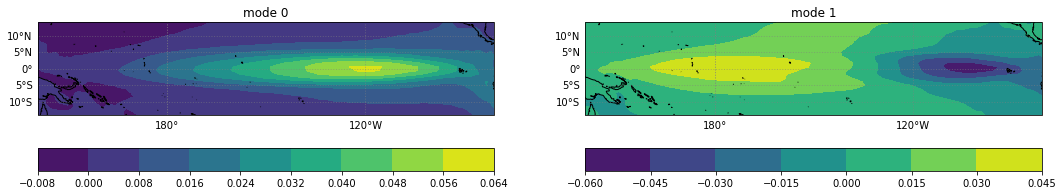

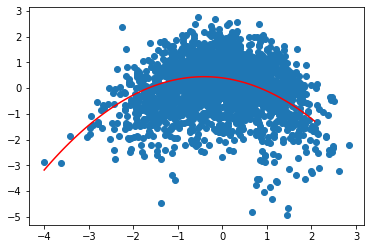

CMCC-CM2-SR5
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_CMCC-CM2-SR5_historical_r1i1p1f1_gn_185001-201412.nc']
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_CMCC-CM2-SR5_ssp585_r1i1p1f1_gn_201501-210012.nc']
-0.3704440537539594


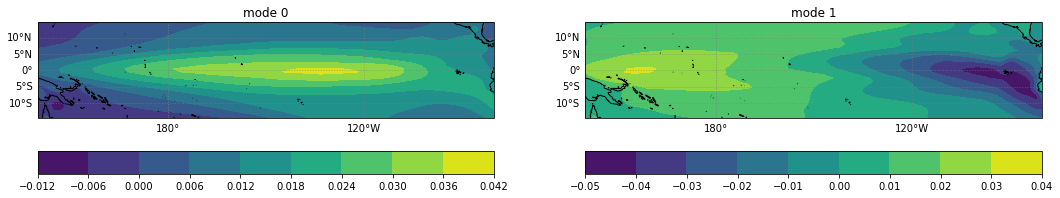

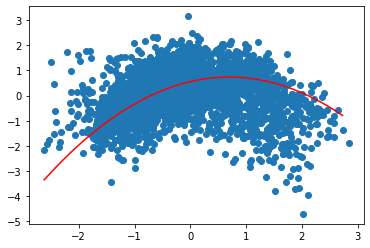

CNRM-CM6-1
CNRM-CM6-1tas_Amonhistoricalr1i1p1f1 file not found on ESGF
Files (filter term: tas_Amon_.*?CNRM-CM6-1_historical_r1i1p1f1_.*?\.nc ) not found, possibly test name is wrong
CNRM-ESM2-1
CNRM-ESM2-1tas_Amonhistoricalr1i1p1f1 file not found on ESGF
Files (filter term: tas_Amon_.*?CNRM-ESM2-1_historical_r1i1p1f1_.*?\.nc ) not found, possibly test name is wrong
EC-Earth3
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3_historical_r1i1p1f1_gr_185001-185012.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3_historical_r1i1p1f1_gr_185101-185112.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3_historical_r1i1p1f1_gr_185201-185212.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3_historical_r1i1p1f1_gr_185301-185312.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3_historical_r1i1p1f1_gr_185401-185412.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3_historical_r1i1p1f1_gr_185501-185512.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3_historical_r1i1p1f1_gr_185601-185612.nc', '/mnt/e/CMI

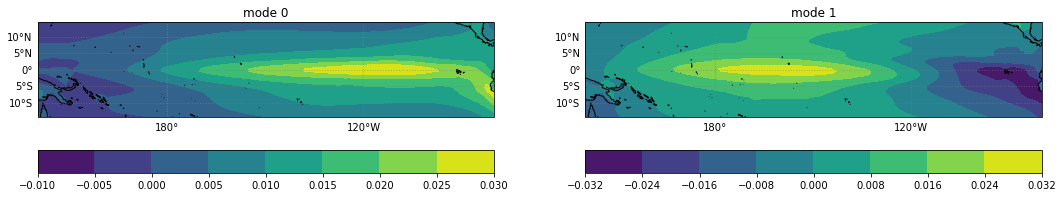

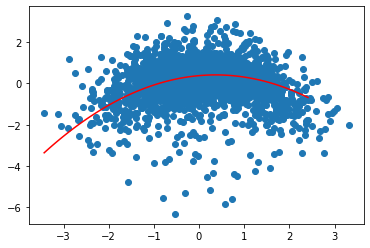

EC-Earth3-Veg
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3-Veg_historical_r1i1p1f1_gr_185001-185012.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3-Veg_historical_r1i1p1f1_gr_185101-185112.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3-Veg_historical_r1i1p1f1_gr_185201-185212.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3-Veg_historical_r1i1p1f1_gr_185301-185312.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3-Veg_historical_r1i1p1f1_gr_185401-185412.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3-Veg_historical_r1i1p1f1_gr_185501-185512.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3-Veg_historical_r1i1p1f1_gr_185601-185612.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3-Veg_historical_r1i1p1f1_gr_185701-185712.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3-Veg_historical_r1i1p1f1_gr_185801-185812.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3-Veg_historical_r1i1p1f1_gr_185901-185912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_EC-Earth3-Veg_historical_r1i1p1f1_gr_186

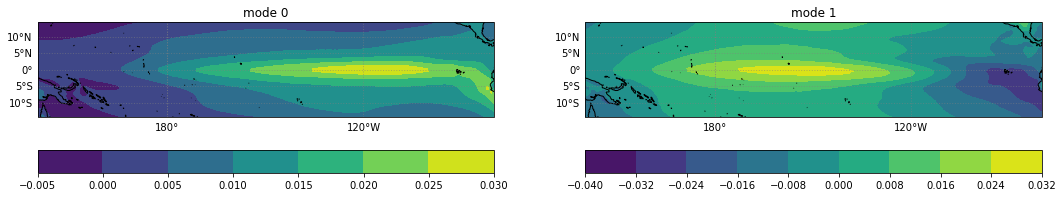

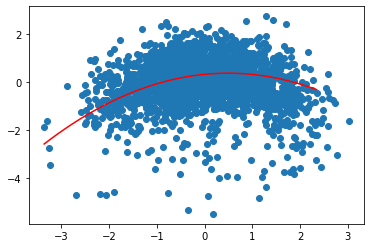

MIROC6
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MIROC6_historical_r1i1p1f1_gn_195001-201412.nc']
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MIROC6_ssp585_r1i1p1f1_gn_201501-210012.nc']
-0.46101487509730826


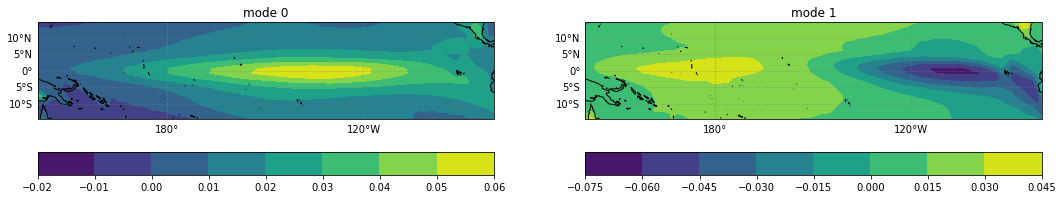

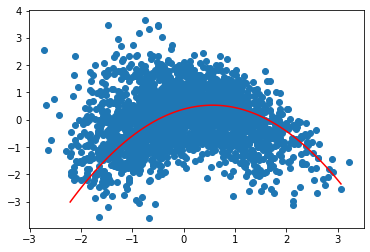

MIROC-ES2L
MIROC-ES2Ltas_Amonhistoricalr1i1p1f1 file not found on ESGF
Files (filter term: tas_Amon_.*?MIROC-ES2L_historical_r1i1p1f1_.*?\.nc ) not found, possibly test name is wrong
HadGEM3-GC31-LL
HadGEM3-GC31-LLtas_Amonhistoricalr1i1p1f1 file not found on ESGF
Files (filter term: tas_Amon_.*?HadGEM3-GC31-LL_historical_r1i1p1f1_.*?\.nc ) not found, possibly test name is wrong
MPI-ESM1-2-HR
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_185001-185412.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_185501-185912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_186001-186412.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_186501-186912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_187001-187412.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_187501-187912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-HR_historica

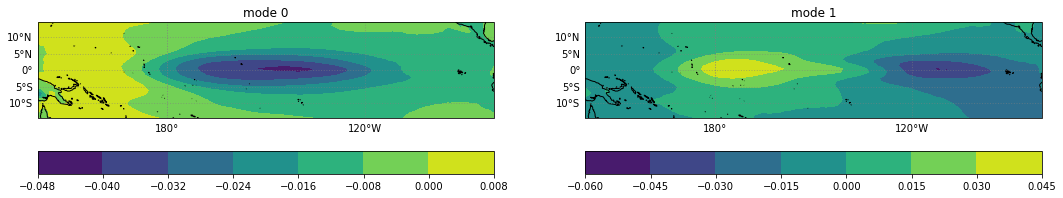

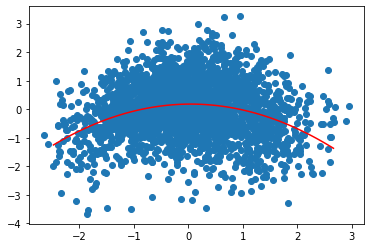

MPI-ESM1-2-LR
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_185001-186912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_187001-188912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_189001-190912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_191001-192912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_193001-194912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_195001-196912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_197001-198912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_199001-200912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_201001-201412.nc']
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-LR_ssp585_r1i1p1f1_gn_201501-203412.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MPI-ESM1-2-LR_ssp585_r1i1p1f1_gn_203501-205

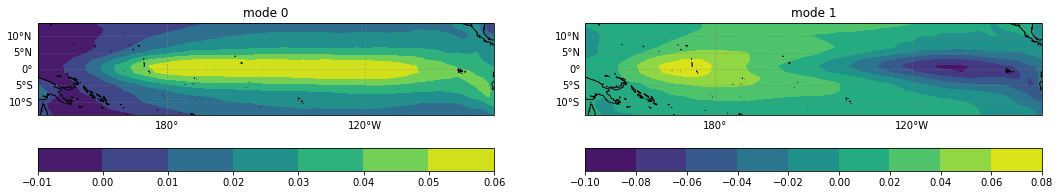

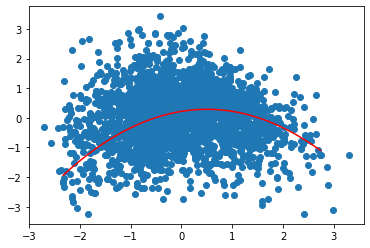

MRI-ESM2-0
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc']
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MRI-ESM2-0_ssp585_r1i1p1f1_gn_210101-230012.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_MRI-ESM2-0_ssp585_r1i1p1f1_gn_201501-210012.nc']
-0.18931810928215134


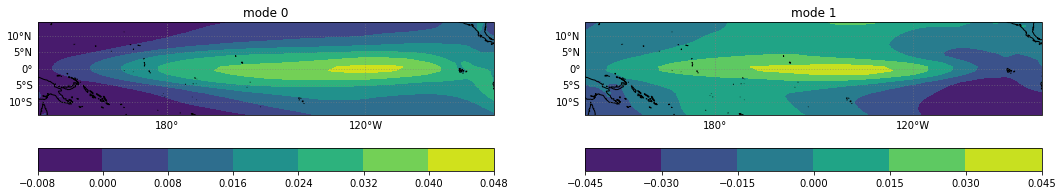

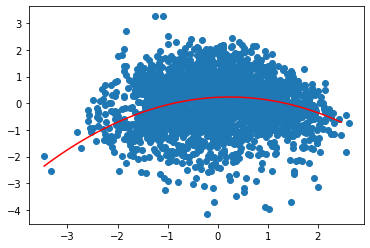

GISS-E2-1-G
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_GISS-E2-1-G_historical_r1i1p1f1_gn_185001-190012.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_GISS-E2-1-G_historical_r1i1p1f1_gn_190101-195012.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_GISS-E2-1-G_historical_r1i1p1f1_gn_195101-200012.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_GISS-E2-1-G_historical_r1i1p1f1_gn_200101-201412.nc']
GISS-E2-1-Gtas_Amonssp585r1i1p1f1 file not found on ESGF
Files (filter term: tas_Amon_.*?GISS-E2-1-G_ssp585_r1i1p1f1_.*?\.nc ) not found, possibly test name is wrong
CESM2
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc']
CESM2tas_Amonssp585r1i1p1f1 file not found on ESGF
Files (filter term: tas_Amon_.*?CESM2_ssp585_r1i1p1f1_.*?\.nc ) not found, possibly test name is wrong
CESM2-WACCM
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc']
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amo

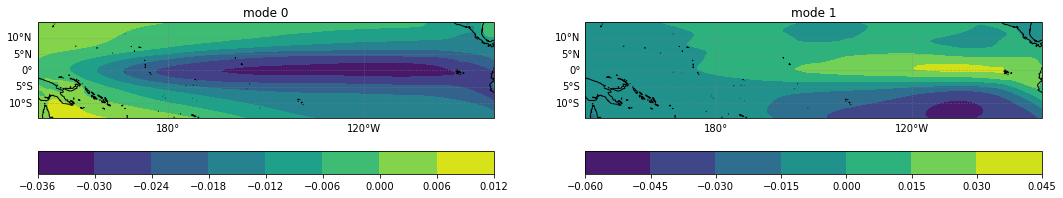

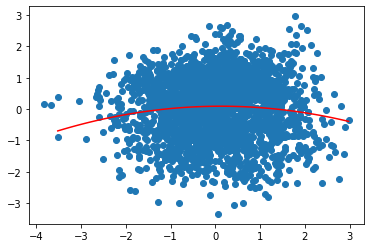

NorESM2-LM
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-LM_historical_r1i1p1f1_gn_185001-185912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-LM_historical_r1i1p1f1_gn_186001-186912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-LM_historical_r1i1p1f1_gn_187001-187912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-LM_historical_r1i1p1f1_gn_188001-188912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-LM_historical_r1i1p1f1_gn_189001-189912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-LM_historical_r1i1p1f1_gn_190001-190912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-LM_historical_r1i1p1f1_gn_191001-191912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-LM_historical_r1i1p1f1_gn_192001-192912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-LM_historical_r1i1p1f1_gn_193001-193912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-LM_historical_r1i1p1f1_gn_194001-194912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-LM_historical_r1i1p1f1_gn_195001-195912.nc', '/mnt/e/CMIP5-PMIP3/

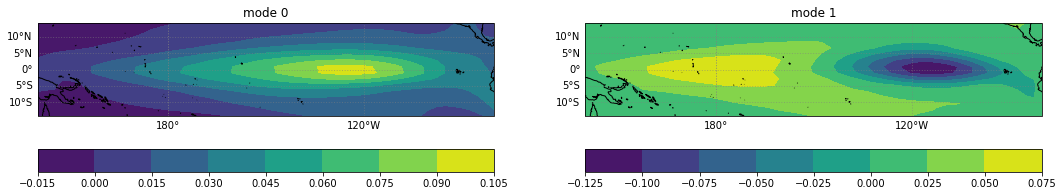

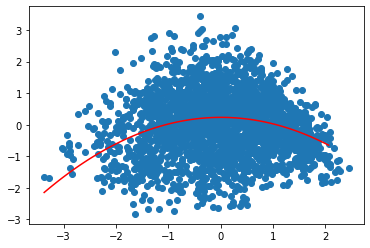

NorESM2-MM
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_185001-185912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_186001-186912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_187001-187912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_188001-188912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_189001-189912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_190001-190912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_191001-191912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_192001-192912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_193001-193912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_194001-194912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_NorESM2-MM_historical_r1i1p1f1_gn_195001-195912.nc', '/mnt/e/CMIP5-PMIP3/

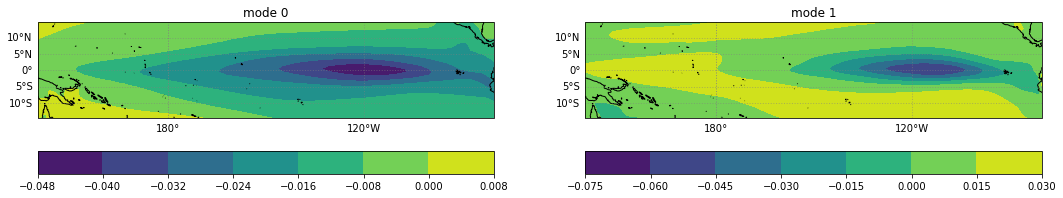

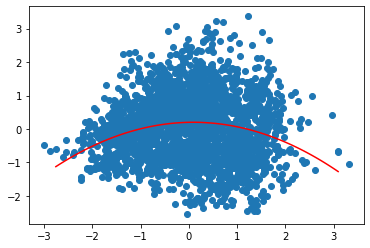

GFDL-ESM4
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_185001-194912.nc', '/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_GFDL-ESM4_historical_r1i1p1f1_gr1_195001-201412.nc']
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_GFDL-ESM4_ssp585_r1i1p1f1_gr1_201501-210012.nc']
-0.2619021457737912


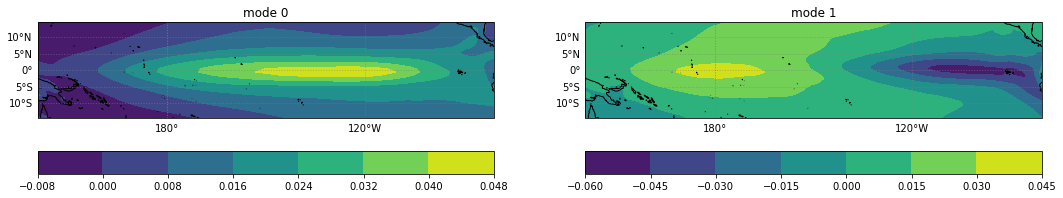

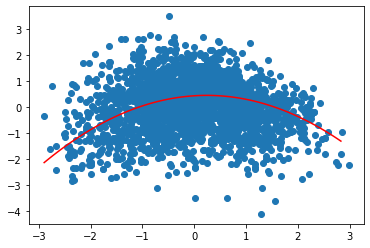

CIESM
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_CIESM_historical_r1i1p1f1_gr_185001-201412.nc']
['/mnt/e/CMIP5-PMIP3/CMIP6/tas_Amon_CIESM_ssp585_r1i1p1f1_gr_201501-210012.nc']
-0.19143045670878317


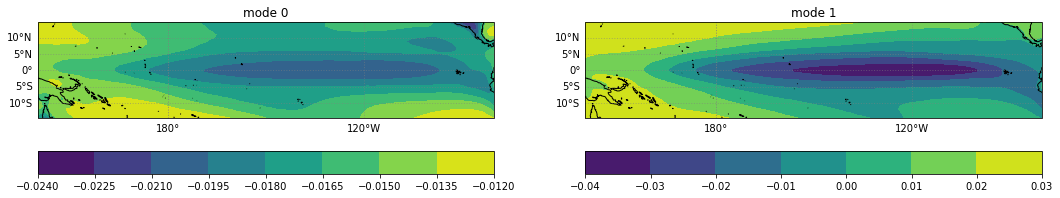

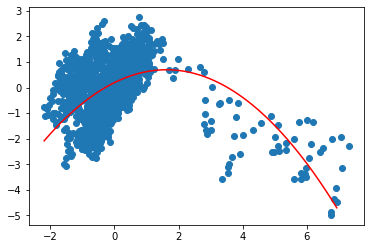

In [32]:
%run ../utils/ecIndex.ipynb

for iModel in expectedToUse:
    try:
        print(iModel[1])
        eofSolver=solver(iModel)

        indeces, pFit, eofsXr = ecIndex(eofSolver)
        indeces['model']=iModel[1]

        print(indeces.alpha.values)
        
        fig=plt.figure(figsize=(18,12))

        for mode in [0,1]:
            ax=fig.add_subplot(1,2,mode+1,
                           projection=ccrs.Miller(central_longitude=210))

            ensoPlotter(eofsXr.sel(mode=mode), ax)

            plt.title("mode " + str(mode))

        plt.show()

        fig = plt.figure()

        plt.scatter(indeces.pc1, indeces.pc2)

        plt.plot(*pFit.linspace(), 'r')
        
        plt.show()
        
    except Exception as e:
        print(e)